#  5.3 示范案例

##  5.3.1 调用示例

### （1）AdaBoost

Visit AdaBoostClassifier from [Sklearn-AdaBoost] [1]

  [1]: http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier/        "Sklearn-AdaBoost"

In [1]:
# 训练一个包含 100 个弱学习器的 AdaBoost 分类器
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

iris = load_iris()   # 花朵数据集
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.9599673202614379

### （2）决策树

Visit DecisionTreeClassifier from [Sklearn-tree] [1]

  [1]: http://sklearn.apachecn.org/cn/0.19.0/modules/tree.html#tree-classification/        "Sklearn-tree"

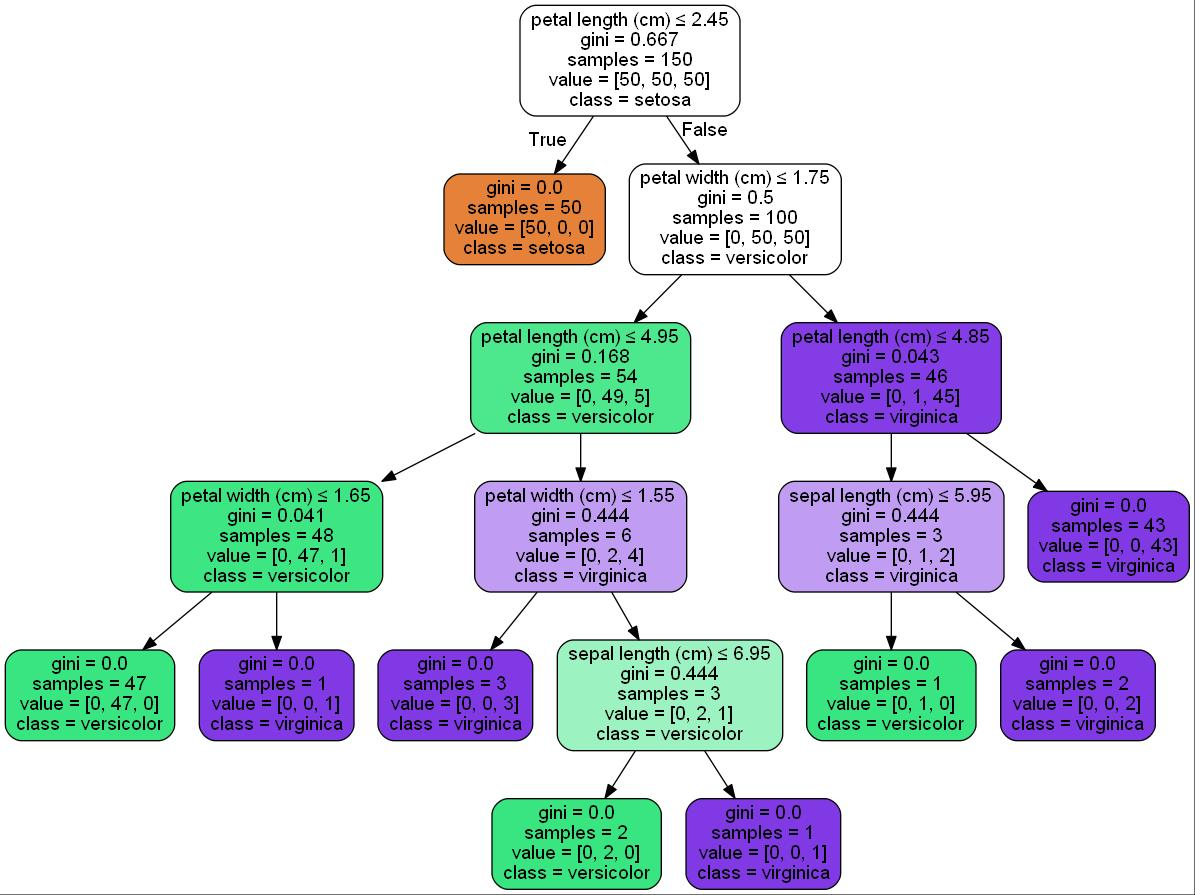

In [2]:
import pydotplus 
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clfmodel = clf.fit(iris.data, iris.target)
from IPython.display import Image
dot_data = tree.export_graphviz(clfmodel, out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,
                         label='all',filled=True,rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_jpg())


### （3）随机森林

Visit RandomForestClassifier from [Sklearn-RandomForest] [1]

  [1]: http://sklearn.apachecn.org/cn/0.19.0/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier/        "Sklearn-RandomForest"

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)
print(clf.feature_importances_)
print(clf.predict([[0, 0, 0, 0]]))

[0.17287856 0.80608704 0.01884792 0.00218648]
[1]


##  5.3.2 分析示例

In [4]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Normalized
def Normalized(x):
    minx=np.min(x)
    maxX=np.max(x)
    x=(x-minx)/(maxX-minx)
    return x;
# transform label of class to -1 and 1
def classtransform(x):
    for i in range(0,len(x)):
        if(x[i]>0):
            x[i]=1
        else:
            x[i]=-1
    return x;
# the datasets of two randoms
def makerandoms(n):
    np.random.seed(0)
    X = np.random.rand(n, 2)
    rand_X=255*Normalized(X)
    m=[]
    for i in range(0,n):
        if (rand_X[:,0][i]>128 and rand_X[:,1][i]>128) or (rand_X[:,0][i]<=127 and rand_X[:,1][i]<=127):
            m.append(0)
        else:
            m.append(1)
    Y=classtransform(m)
    return rand_X,Y;
# 离散化网格
def makeGrids():
    x = np.linspace(0,255,256)
    y = np.linspace(0,255,256)
    X,Y = np.meshgrid(x,y)
    Xzip=list(zip(X.flat,Y.flat))
    # Xzip = np.array(Xzip)
    points = [point for point in zip(X.flat,Y.flat)]
    points = np.array(points)
    return Xzip,points;

#离散网格点生成
Xzip,points = makeGrids()
np.random.shuffle(points)
points = np.array(points)

n_samples=2000
XR,yr = makerandoms(n_samples)
cor = ListedColormap(['Blue', 'Orange'])
def PlotSamplesAndResults(classfierInitial,titlename):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sct=plt.scatter(XR[:,0], XR[:,1], c= yr,s= 10,cmap = cor)
    plt.title('two-randoms')
    plt.subplot(1,2,2)
    clffit = classfierInitial.fit(XR,yr)
    clfresult = clffit.predict(points)
    sct=plt.scatter(points[:,0], points[:,1], c= clfresult,s = 4,cmap = cor)
    plt.title(titlename)
    plt.show();
    return clffit;

### （1）AdaBoosting的分类过程

AdaBoosting：基分类器设置为决策树，多棵树串行方式，。

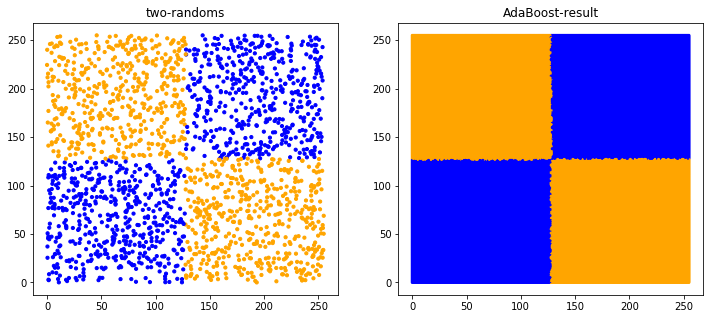

In [5]:
clfAdaBoost = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion='gini',max_depth=3),n_estimators = 10)
AdaBoostfitModel = PlotSamplesAndResults(clfAdaBoost,'AdaBoost-result')

### （2）随机森林的结果形成过程（含决策树）

决策树：分析单棵树的生成过程，绘制出树的形态和节点分裂状态

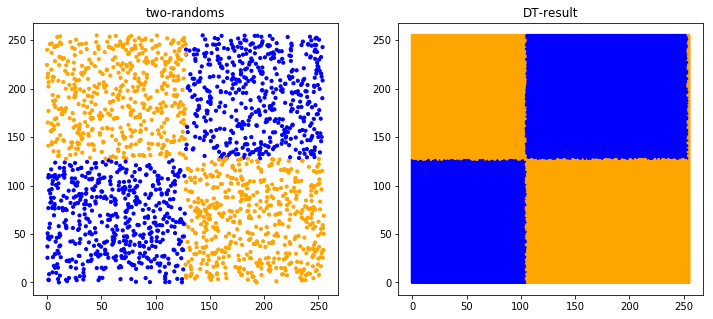

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [6]:
clfDT = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
DTfitModel = PlotSamplesAndResults(clfDT,'DT-result')
print(DTfitModel)

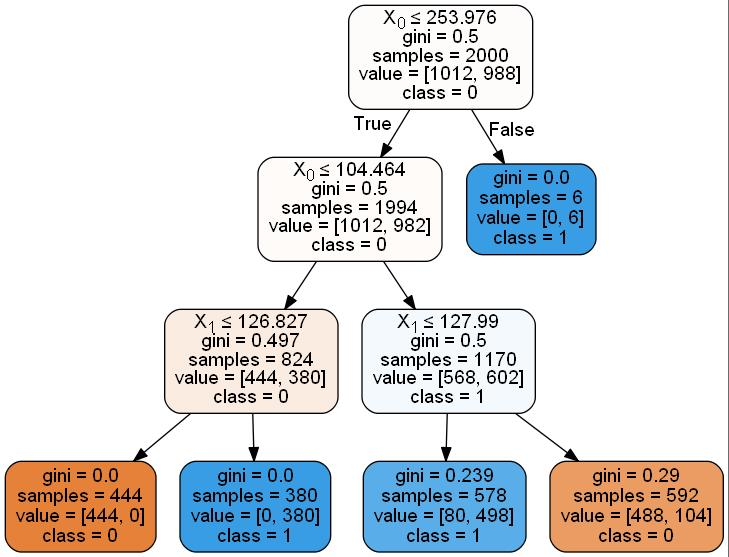

In [7]:
dot_data = tree.export_graphviz(DTfitModel, out_file=None,class_names="01",label='all',filled=True,rounded=True,special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_jpg())

In [ ]:
p = points
# 决策树的一些属性
treeobject = DTfitModel.tree_
treeclass = DTfitModel.classes_
featureimportance = DTfitModel.feature_importances_
print(featureimportance)
getparams=DTfitModel.get_params(deep=True)
applyDTR=DTfitModel.apply(p)
Decisionpath=DTfitModel.decision_path(XR,check_input=True)

[0.00845054 0.99154946]


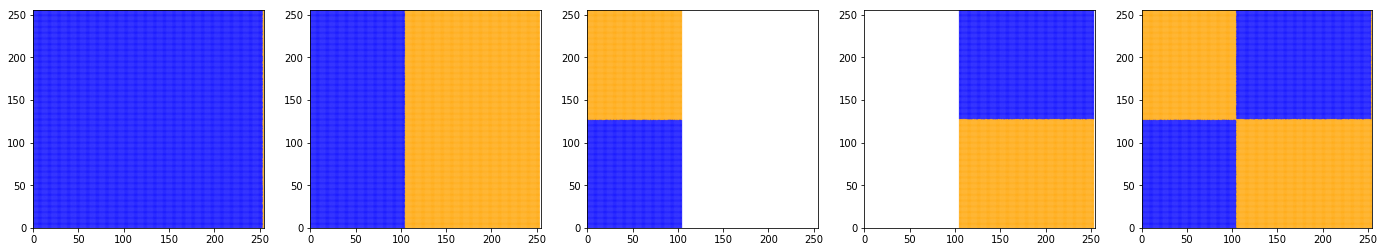

In [8]:
# 从根节点至叶节点，特征选择和节点分裂绘制
label=[]; pointR=[]; pointL=[];
for k in range(0,len(p)):
    if(points[k][0]<=253.9763):
        label.append(0)
        pointL.append(p[k])
    else:
        label.append(1)
        pointR.append(p[k])
pointL=np.array(pointL); 
label2=[];    pointR2=[]; pointL2=[];    
for j in range(0,len(pointL)):
    if(pointL[j][0]<=104.4643):
        label2.append(0)
        pointL2.append(pointL[j])
    else:
        label2.append(1)
        pointR2.append(pointL[j])
pointL2=np.array(pointL2); pointR2=np.array(pointR2);       
label31=[];     label32=[];     
for m in range(0,len(pointL2)):
    if(pointL2[m][1]<=126.8268):
        label31.append(0)
    else:
        label31.append(1)       
for n in range(0,len(pointR2)):
    if(pointR2[n][1]<=127.9898):
        label32.append(1)
    else:
        label32.append(0)
labelAll=[]; 
for k in range(0,len(points)):
    if(((points[:,0][k]<=104.4643) and (points[:,1][k]<=126.8268)) or (((points[:,0][k]>104.4643) and (points[:,0][k]<=253.9763)) and ((points[:,1][k]>127.9898) and (points[:,1][k]<=255)))):
        labelAll.append(0)
    else:
        labelAll.append(1)        
plt.figure(figsize=(24,4))
plt.subplot(151)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(p[:,0], p[:,1], c=label,s=0.1,cmap=cor)
plt.subplot(152)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(pointL[:,0], pointL[:,1], c=label2,s=0.1,cmap=cor)
plt.subplot(153)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(pointL2[:,0], pointL2[:,1], c=label31,s=0.1,cmap=cor)
plt.subplot(154)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(pointR2[:,0], pointR2[:,1], c=label32,s=0.1,cmap=cor)
plt.subplot(155)
plt.xlim(0,255);  plt.ylim(0,255);
plt.scatter(points[:,0], points[:,1], c=labelAll,s=0.1,cmap=cor)
plt.show()

决策树：多棵树并行方式，最终类别判定通过投票法和加权概率最大确定。

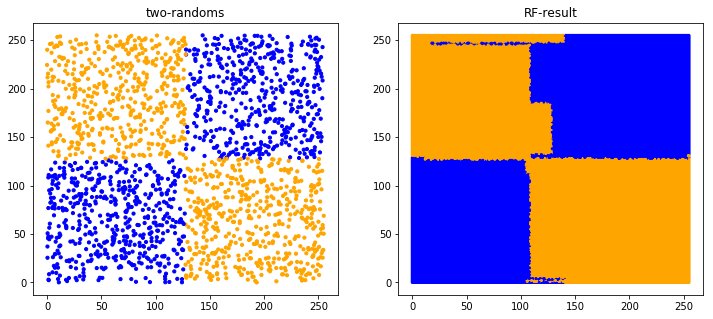

In [9]:
clfRF = RandomForestClassifier(n_estimators=4,criterion='gini', max_depth=4)
RFfitModel = PlotSamplesAndResults(clfRF,'RF-result')

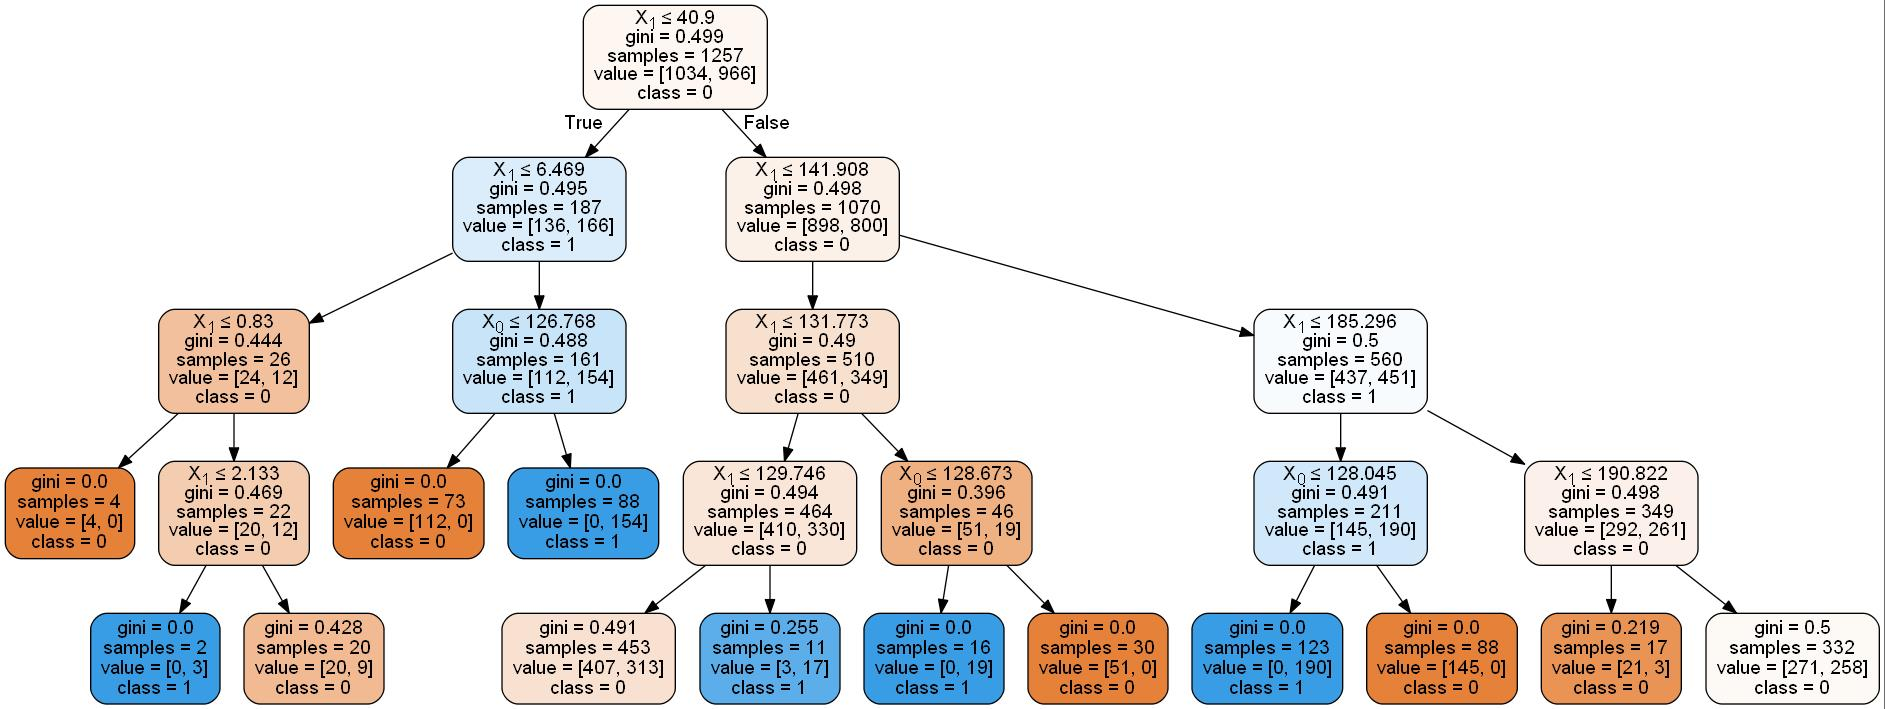

In [10]:
def PlotOneTree(eatimator):
    dot_data = tree.export_graphviz(eatimator, out_file=None,class_names="01",label='all',filled=True,rounded=True,special_characters=True) 
    graph = pydotplus.graph_from_dot_data(dot_data)
    return graph;
    
alleatimators = RFfitModel.estimators_                # 获取到随机森林模型中所有的树对象

# 第一棵树的结构
graph0 = PlotOneTree(alleatimators[0])
Image(graph0.create_jpg())

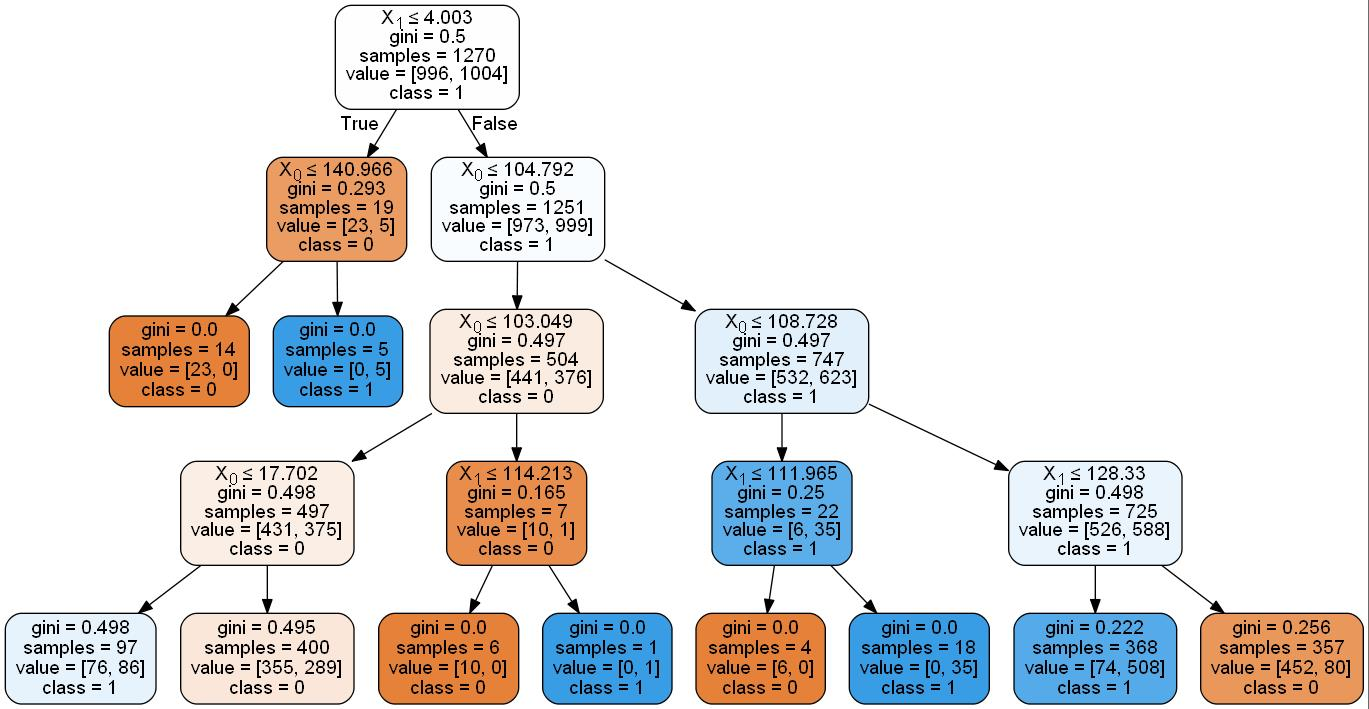

In [11]:
# 第一棵树的结构
graph1 = PlotOneTree(alleatimators[1])
Image(graph1.create_jpg())

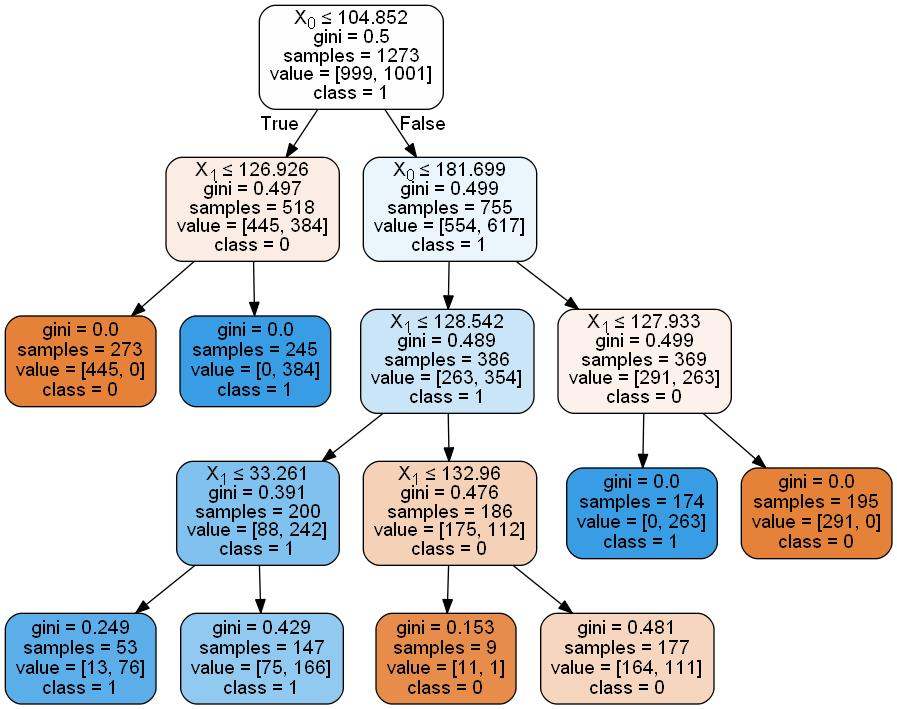

In [12]:
# 第二棵树的结构
graph2 = PlotOneTree(alleatimators[2])
Image(graph2.create_jpg())

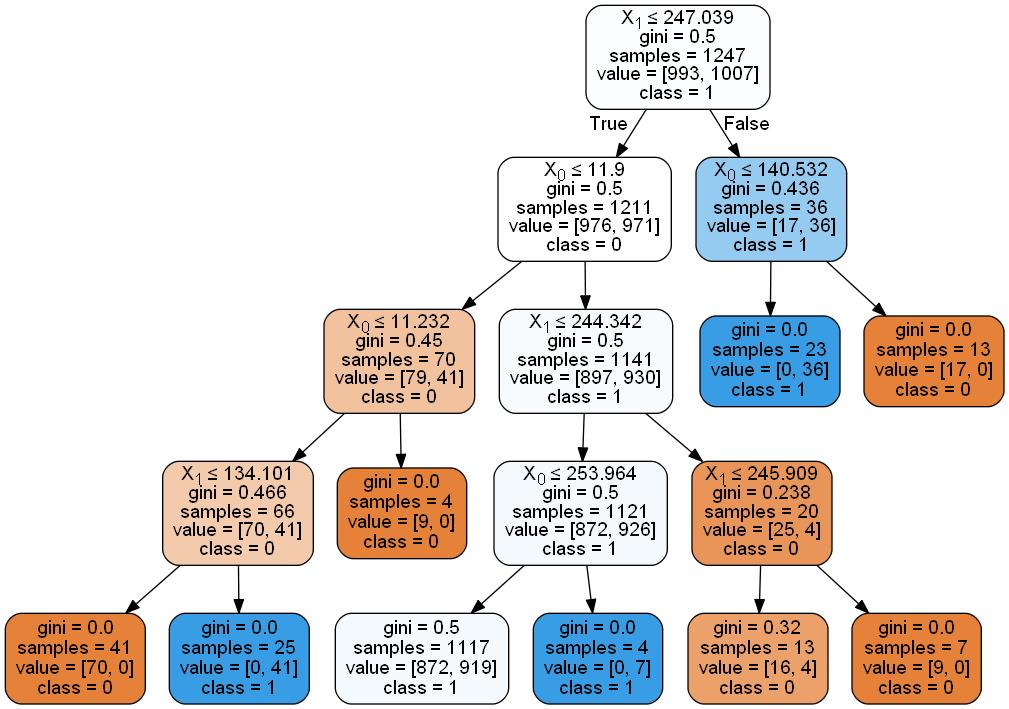

In [13]:
# 第三棵树的结构
graph3 = PlotOneTree(alleatimators[3])
Image(graph3.create_jpg())